In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import datetime
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [5]:
start_date, end_date = '2015-02-09', datetime.datetime.today()

In [10]:
data = w.edb('M0331236, M0020223', start_date, end_date)

In [28]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['vix', 'sz50'])
df.index = pd.to_datetime(df.index)

In [29]:
df.tail()

,vix,sz50
2020-02-13,21.5473,2875.4794
2020-02-14,20.7043,2895.0644
2020-02-17,20.9021,2950.0699
2020-02-18,20.9719,2924.3981
2020-02-19,21.3596,2923.7633


In [30]:
ret = df.pct_change()

In [52]:
corr = ret['vix'].rolling(20).corr(ret['sz50'])

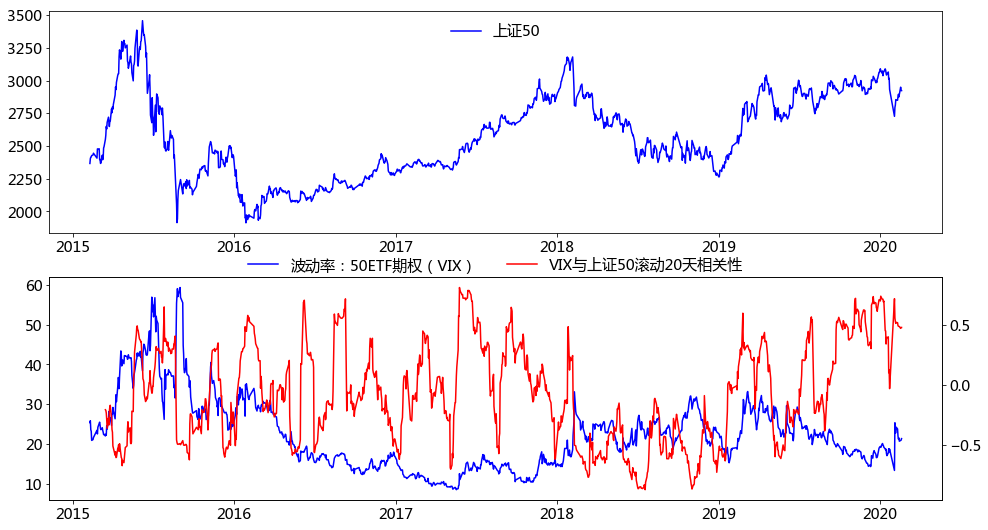

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

# lns1 = ax1.plot(df[df.index >= '2018-01-01']['sz50'], label='上证50', color='blue')
lns1 = ax1.plot(df['sz50'], label='上证50', color='blue')
ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)

lns = lns1
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.))

lns1 = ax2.plot(df['vix'], label='波动率：50ETF期权（VIX）', color='blue')
# lns1 = ax2.plot(df[df.index >= '2018-01-01']['vix'], label='波动率：50ETF期权（VIX）', color='blue')
axx2 = ax2.twinx()
# lns2 = axx2.plot(corr[corr.index >= '2018-01-01'], label='VIX与上证50滚动20天相关性', color='red')
lns2 = axx2.plot(corr, label='VIX与上证50滚动20天相关性', color='red')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15))
ax2.yaxis.set_tick_params(labelsize=15)
axx2.yaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)